# Introduction #

In [1]:
import pandas as pd
import datetime
# to pull data from the internet
# may have to do conda install pandas-datareader
from pandas_datareader import data as web

In [2]:
start=datetime.datetime(2010,1,1)
end=datetime.datetime(2016,11,30)

In [3]:
dataframe=web.DataReader("XOM","yahoo",start,end)

In [4]:
dataframe.head() 

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2010-01-04  68.720001  69.260002  68.190002  69.150002  27809100  56.700952
2010-01-05  69.190002  69.449997  68.800003  69.419998  30174700  56.922342
2010-01-06  69.449997  70.599998  69.339996  70.019997  35044700  57.414323
2010-01-07  69.900002  70.059998  69.419998  69.800003  27192100  57.233934
2010-01-08  69.690002  69.750000  69.220001  69.519997  24891800  57.004337

In [5]:
dataframe.tail()

Open       High        Low      Close   Volume  Adj Close
Date                                                                      
2016-11-22  86.690002  87.239998  85.970001  86.680000  9275500  86.680000
2016-11-23  86.540001  87.080002  86.309998  86.919998  5996300  86.919998
2016-11-25  86.709999  87.139999  86.540001  87.120003  5042300  87.120003
2016-11-28  86.949997  87.129997  86.370003  86.470001  7208600  86.470001
2016-11-29  85.419998  86.080002  85.080002  85.900002  9150300  85.900002

In [6]:
%matplotlib inline
from matplotlib import pyplot, style
style.use('fivethirtyeight')


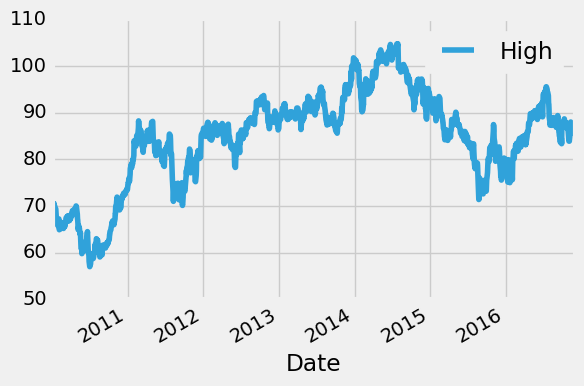

In [7]:
dataframe['High'].plot()
pyplot.legend()
pyplot.show()


# Panadas Basics #

In [8]:
# dictionary to dataframe
web_stats = {'Day':[1,2,3,4,5,6],
             'Visitors':[43,34,65,56,29,76],
             'Bounce Rate':[65,67,78,65,45,52]}

df_web_stats = pd.DataFrame(web_stats)

In [9]:
df_web_stats.head()

Bounce Rate  Day  Visitors
0           65    1        43
1           67    2        34
2           78    3        65
3           65    4        56
4           45    5        29

In [10]:
df_web_stats.set_index('Day',inplace=True)

In [11]:
df_web_stats.head()

Bounce Rate  Visitors
Day                       
1             65        43
2             67        34
3             78        65
4             65        56
5             45        29

In [12]:
df_web_stats[['Visitors','Bounce Rate']]

Visitors  Bounce Rate
Day                       
1          43           65
2          34           67
3          65           78
4          56           65
5          29           45
6          76           52

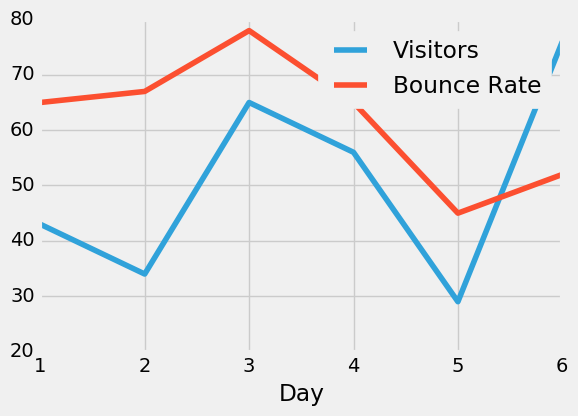

In [13]:
df_web_stats[['Visitors','Bounce Rate']].plot()
pyplot.legend()
pyplot.show()

# IO Basics #

In [14]:
# conda install quandl
import quandl

In [15]:
# on quandl website, search for [home value index 77006] (Austin, TX)
# use python api
df_3b=quandl.get("ZILL/Z77006_3B", authtoken="Ti87qx22utFydZWJHqyB")

In [16]:
df_3b.head()

Value
Date                
1996-04-30  178500.0
1996-05-31  178800.0
1996-06-30  178900.0
1996-07-31  179100.0
1996-08-31  178800.0

In [17]:
# while saving csv, if index_col is not specified, it will be lost
df_3b.to_csv('./data/df_3b.csv',index_col=0)

In [18]:
df_3b_csv=pd.read_csv('./data/df_3b.csv',index_col=0)

In [19]:
df_3b_csv.head()

Value
Date                
1996-04-30  178500.0
1996-05-31  178800.0
1996-06-30  178900.0
1996-07-31  179100.0
1996-08-31  178800.0

In [20]:
# change column names
df_3b_csv.columns=['Houser Prices']
df_3b_csv.head()

Houser Prices
Date                     
1996-04-30       178500.0
1996-05-31       178800.0
1996-06-30       178900.0
1996-07-31       179100.0
1996-08-31       178800.0

In [21]:
# save without headers
df_3b_csv.to_csv('./data/df_3b_cvs2.csv',header=False)

In [22]:
df_3b_csv2=pd.read_csv('./data/df_3b_cvs2.csv',names=['Date','House Prices'],index_col=0)
df_3b_csv2.head()

House Prices
Date                    
1996-04-30      178500.0
1996-05-31      178800.0
1996-06-30      178900.0
1996-07-31      179100.0
1996-08-31      178800.0

In [23]:
# save as html
df_3b_csv2.to_html('./data/df_3b.html')
# open the file in browser to check the house prices

In [24]:
# rename columns
df_3b_csv2.rename(columns={'House Prices':'Prices'},inplace=True)

In [25]:
df_3b_csv2.head()

Prices
Date                
1996-04-30  178500.0
1996-05-31  178800.0
1996-06-30  178900.0
1996-07-31  179100.0
1996-08-31  178800.0

# Building Dataset #

In [26]:
# housing price index for TX
df_hpi_tx=quandl.get("FMAC/HPI_TX",authtoken="Ti87qx22utFydZWJHqyB")

In [27]:
df_hpi_tx.head()

Value
Date                 
1975-01-31  32.659989
1975-02-28  32.970745
1975-03-31  33.542148
1975-04-30  34.383316
1975-05-31  34.652016

In [29]:
# will have to do: conda install html5lib
import html5lib
us_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
us_states[0]

0               1               2                  3
0   Abbreviation      State Name         Capital     Became a State
1             AL         Alabama      Montgomery  December 14, 1819
2             AK          Alaska          Juneau    January 3, 1959
3             AZ         Arizona         Phoenix  February 14, 1912
4             AR        Arkansas     Little Rock      June 15, 1836
5             CA      California      Sacramento  September 9, 1850
6             CO        Colorado          Denver     August 1, 1876
7             CT     Connecticut        Hartford    January 9, 1788
8             DE        Delaware           Dover   December 7, 1787
9             FL         Florida     Tallahassee      March 3, 1845
10            GA         Georgia         Atlanta    January 2, 1788
11            HI          Hawaii        Honolulu    August 21, 1959
12            ID           Idaho           Boise       July 3, 1890
13            IL        Illinois     Springfield   December 3, 1818
14            IN         Indiana    Indianapolis  December 11, 1816
15            IA            Iowa      Des Moines  December 28, 1846
16            KS          Kansas          Topeka   January 29, 1861
17            KY        Kentucky       Frankfort       June 1, 1792
18            LA       Louisiana     Baton Rouge     April 30, 1812
19            ME           Maine         Augusta     March 15, 1820
20            MD        Maryland       Annapolis     April 28, 1788
21            MA   Massachusetts          Boston   February 6, 1788
22            MI        Michigan         Lansing   January 26, 1837
23            MN       Minnesota      Saint Paul       May 11, 1858
24            MS     Mississippi         Jackson  December 10, 1817
25            MO        Missouri  Jefferson City    August 10, 1821
26            MT         Montana          Helena   November 8, 1889
27            NE        Nebraska         Lincoln      March 1, 1867
28            NV          Nevada     Carson City   October 31, 1864
29            NH   New Hampshire         Concord      June 21, 1788
30            NJ      New Jersey         Trenton  December 18, 1787
31            NM      New Mexico        Santa Fe    January 6, 1912
32            NY        New York          Albany      July 26, 1788
33            NC  North Carolina         Raleigh  November 21, 1789
34            ND    North Dakota        Bismarck   November 2, 1889
35            OH            Ohio        Columbus      March 1, 1803
36            OK        Oklahoma   Oklahoma City  November 16, 1907
37            OR          Oregon           Salem  February 14, 1859
38            PA    Pennsylvania      Harrisburg  December 12, 1787
39            RI    Rhode Island      Providence       May 19, 1790
40            SC  South Carolina        Columbia       May 23, 1788
41            SD    South Dakota          Pierre   November 2, 1889
42            TN       Tennessee       Nashville       June 1, 1796
43            TX           Texas          Austin  December 29, 1845
44            UT            Utah  Salt Lake City    January 4, 1896
45            VT         Vermont      Montpelier      March 4, 1791
46            VA        Virginia        Richmond      June 25, 1788
47            WA      Washington         Olympia  November 11, 1889
48            WV   West Virginia      Charleston      June 20, 1863
49            WI       Wisconsin         Madison       May 29, 1848
50            WY         Wyoming        Cheyenne      July 10, 1890

In [31]:
# us_states is a list of dataframes
# us_states[0] gets us the first dataframe
# us_states[0][0] gets us the first column of the first dataframe
# us_states[0][0][1:] gets us the 2nd row onwards of the first column of the first dataframe
for us_states_abbv in us_states[0][0][1:]:
    print(us_states_abbv)

AL
AK
AZ
AR
CA
CO
CT
DE
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WV
WI
WY


In [32]:
for us_states_abbv in us_states[0][0][1:]:
    print('FMAC/HPI_'+str(us_states_abbv))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


# Concatenating and Appending Dataframes #

In [33]:
# 4 ways of combining dataframes
# concatenation, joining, merging, appending
import pandas as pd

df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [35]:
# same columns, different index
concat=pd.concat([df1,df2])
concat

HPI  Int_rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                65
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                65
2008   85         2                55

In [38]:
# different columns, different index
# we get NaNs
concat=pd.concat([df1,df2,df3])
concat

HPI  Int_rate  Low_tier_HPI  US_GDP_Thousands
2001   80         2           NaN              50.0
2002   85         3           NaN              55.0
2003   88         2           NaN              65.0
2004   85         2           NaN              55.0
2005   80         2           NaN              50.0
2006   85         3           NaN              55.0
2007   88         2           NaN              65.0
2008   85         2           NaN              55.0
2001   80         2          50.0               NaN
2002   85         3          52.0               NaN
2003   88         2          50.0               NaN
2004   85         2          53.0               NaN

In [39]:
df4=df1.append(df2)
df4

HPI  Int_rate  US_GDP_Thousands
2001   80         2                50
2002   85         3                55
2003   88         2                65
2004   85         2                55
2005   80         2                50
2006   85         3                55
2007   88         2                65
2008   85         2                55

In [43]:
df5=df1.append(df3)
df5

HPI  Int_rate  Low_tier_HPI  US_GDP_Thousands
2001   80         2           NaN              50.0
2002   85         3           NaN              55.0
2003   88         2           NaN              65.0
2004   85         2           NaN              55.0
2001   80         2          50.0               NaN
2002   85         3          52.0               NaN
2003   88         2          50.0               NaN
2004   85         2          53.0               NaN

In [44]:
s = pd.Series([80,2,50], index=['HPI','Int_rate','US_GDP_Thousands'])
df6 = df1.append(s, ignore_index=True)
print(df6)

   HPI  Int_rate  US_GDP_Thousands
0   80         2                50
1   85         3                55
2   88         2                65
3   85         2                55
4   80         2                50


# Joining and Merging #

In [51]:
df1 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2001, 2002, 2003, 2004])

df2 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55]},
                   index = [2005, 2006, 2007, 2008])

df3 = pd.DataFrame({'HPI':[80,85,88,85],
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53]},
                   index = [2001, 2002, 2003, 2004])

In [52]:
pd.merge(df1,df3,on='HPI')

HPI  Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
0   80         2                50            50             7
1   85         3                55            52             8
2   85         3                55            53             6
3   85         2                55            52             8
4   85         2                55            53             6
5   88         2                65            50             9

In [53]:
pd.merge(df1,df2,on=['HPI','Int_rate'])

HPI  Int_rate  US_GDP_Thousands_x  US_GDP_Thousands_y
0   80         2                  50                  50
1   85         3                  55                  55
2   88         2                  65                  65
3   85         2                  55                  55

In [54]:
df7=pd.merge(df1,df3,on='HPI')
df7.set_index('HPI',inplace=True)
df7

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
HPI                                                        
80          2                50            50             7
85          3                55            52             8
85          3                55            53             6
85          2                55            52             8
85          2                55            53             6
88          2                65            50             9

In [55]:
df1.set_index('HPI',inplace=True)
df3.set_index('HPI',inplace=True)
joined=df1.join(df3)
joined

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
HPI                                                        
80          2                50            50             7
85          3                55            52             8
85          3                55            53             6
85          2                55            52             8
85          2                55            53             6
88          2                65            50             9

In [56]:
df1 = pd.DataFrame({
                    'Int_rate':[2, 3, 2, 2],
                    'US_GDP_Thousands':[50, 55, 65, 55],
                    'Year':[2001, 2002, 2003, 2004]
                    })

df3 = pd.DataFrame({
                    'Unemployment':[7, 8, 9, 6],
                    'Low_tier_HPI':[50, 52, 50, 53],
                    'Year':[2001, 2003, 2004, 2005]})

In [59]:
merged = pd.merge(df1,df3, on='Year')
merged

Int_rate  US_GDP_Thousands  Year  Low_tier_HPI  Unemployment
0         2                50  2001            50             7
1         2                65  2003            52             8
2         2                55  2004            50             9

In [60]:
merged = pd.merge(df1,df3, on='Year')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001         2                50            50             7
2003         2                65            52             8
2004         2                55            50             9

In [62]:
# how:
# Left - equal to left outer join SQL - use keys from left frame only
# Right - right outer join from SQL- use keys from right frame only.
# Outer - full outer join - use union of keys
# Inner - use only intersection of keys.
merged = pd.merge(df1,df3, on='Year', how='left')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001         2                50          50.0           7.0
2002         3                55           NaN           NaN
2003         2                65          52.0           8.0
2004         2                55          50.0           9.0

In [65]:
merged = pd.merge(df1,df3, on='Year', how='right')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                          
2001.0       2.0              50.0            50             7
2003.0       2.0              65.0            52             8
2004.0       2.0              55.0            50             9
2005.0       NaN               NaN            53             6

In [66]:
merged = pd.merge(df1,df3, on='Year', how='outer')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                          
2001.0       2.0              50.0          50.0           7.0
2002.0       3.0              55.0           NaN           NaN
2003.0       2.0              65.0          52.0           8.0
2004.0       2.0              55.0          50.0           9.0
2005.0       NaN               NaN          53.0           6.0

In [67]:
merged = pd.merge(df1,df3, on='Year', how='inner')
merged.set_index('Year', inplace=True)
merged

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001         2                50            50             7
2003         2                65            52             8
2004         2                55            50             9

In [68]:
df1.set_index('Year', inplace=True)
df3.set_index('Year', inplace=True)
joined = df1.join(df3, how="outer")
joined

Int_rate  US_GDP_Thousands  Low_tier_HPI  Unemployment
Year                                                        
2001       2.0              50.0          50.0           7.0
2002       3.0              55.0           NaN           NaN
2003       2.0              65.0          52.0           8.0
2004       2.0              55.0          50.0           9.0
2005       NaN               NaN          53.0           6.0

# Pickling #

In [90]:
# using Python pickle
import pickle

def state_list():
    us_states=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return us_states[0][0][1:]

def grab_initial_state_data():
    states=state_list()
    main_df=pd.DataFrame()
    for abbv in states:
        query="FMAC/HPI_"+str(abbv)
        df=quandl.get(query,authtoken="Ti87qx22utFydZWJHqyB")
        df.rename(columns={'Value':str(abbv)},inplace=True)
        if main_df.empty:
            main_df=df
        else:
            main_df=main_df.join(df)
    pickle_out=open('./data/us_states.pickle','wb')
    pickle.dump(main_df,pickle_out)
    pickle_out.close()

grab_initial_state_data()

In [91]:
pickle_in=open('./data/us_states.pickle','rb')
HPI_data=pickle.load(pickle_in)
HPI_data.head()

AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.324038  34.400087  28.886571  36.838213  15.665713  19.666460   
1975-02-28  35.545343  34.911194  29.374322  37.149935  15.721510  19.894520   
1975-03-31  35.803942  35.434316  29.828662  37.420977  15.912556  20.118681   
1975-04-30  36.120498  35.980265  30.179479  37.642638  16.225479  20.327062   
1975-05-31  36.421849  36.576786  30.371230  37.864617  16.486814  20.497741   

                   CT         DE         FL         GA    ...             SD  \
Date                                                      ...                  
1975-01-31  24.530646  27.146975  30.903838  30.862154    ...      37.861487   
1975-02-28  25.051659  27.185646  32.121077  30.583518    ...      37.445064   
1975-03-31  25.443161  27.252283  33.931871  30.466267    ...      37.021567   
1975-04-30  25.663172  27.389022  36.149709  30.532432    ...      36.601128   
1975-05-31  25.733086  27.622613  36.433117  30.653270    ...      36.220049   

                   TN         TX         UT         VT         VA         WA  \
Date                                                                           
1975-01-31  32.210851  32.659989  24.603939  26.556884  27.954539  17.480301   
1975-02-28  32.246969  32.970745  24.947973  26.807912  28.230531  17.549796   
1975-03-31  32.329769  33.542148  25.258222  27.050106  28.431856  17.657853   
1975-04-30  32.457447  34.383316  25.504964  27.270090  28.580271  17.787585   
1975-05-31  32.606660  34.652016  25.668351  27.463349  28.704849  17.904450   

                   WV         WI         WY  
Date                                         
1975-01-31  41.248346  28.142079  31.820164  
1975-02-28  42.277521  28.537453  32.277898  
1975-03-31  43.349320  28.927629  32.762841  
1975-04-30  44.454450  29.277377  33.266394  
1975-05-31  45.566959  29.562586  33.755117  

[5 rows x 50 columns]

In [92]:
# using Pandas pickle
HPI_data.to_pickle('./data/HPI_pandas.pickle')
HPI_data2=pd.read_pickle('./data/HPI_pandas.pickle')
HPI_data2.head()

AL         AK         AZ         AR         CA         CO  \
Date                                                                           
1975-01-31  35.324038  34.400087  28.886571  36.838213  15.665713  19.666460   
1975-02-28  35.545343  34.911194  29.374322  37.149935  15.721510  19.894520   
1975-03-31  35.803942  35.434316  29.828662  37.420977  15.912556  20.118681   
1975-04-30  36.120498  35.980265  30.179479  37.642638  16.225479  20.327062   
1975-05-31  36.421849  36.576786  30.371230  37.864617  16.486814  20.497741   

                   CT         DE         FL         GA    ...             SD  \
Date                                                      ...                  
1975-01-31  24.530646  27.146975  30.903838  30.862154    ...      37.861487   
1975-02-28  25.051659  27.185646  32.121077  30.583518    ...      37.445064   
1975-03-31  25.443161  27.252283  33.931871  30.466267    ...      37.021567   
1975-04-30  25.663172  27.389022  36.149709  30.532432    ...      36.601128   
1975-05-31  25.733086  27.622613  36.433117  30.653270    ...      36.220049   

                   TN         TX         UT         VT         VA         WA  \
Date                                                                           
1975-01-31  32.210851  32.659989  24.603939  26.556884  27.954539  17.480301   
1975-02-28  32.246969  32.970745  24.947973  26.807912  28.230531  17.549796   
1975-03-31  32.329769  33.542148  25.258222  27.050106  28.431856  17.657853   
1975-04-30  32.457447  34.383316  25.504964  27.270090  28.580271  17.787585   
1975-05-31  32.606660  34.652016  25.668351  27.463349  28.704849  17.904450   

                   WV         WI         WY  
Date                                         
1975-01-31  41.248346  28.142079  31.820164  
1975-02-28  42.277521  28.537453  32.277898  
1975-03-31  43.349320  28.927629  32.762841  
1975-04-30  44.454450  29.277377  33.266394  
1975-05-31  45.566959  29.562586  33.755117  

[5 rows x 50 columns]

# Percent Change and Correlation Tables #

In [93]:
HPI_data['TX2']=HPI_data['TX']*2
HPI_data[['TX','TX2']].head()

TX        TX2
Date                            
1975-01-31  32.659989  65.319979
1975-02-28  32.970745  65.941491
1975-03-31  33.542148  67.084297
1975-04-30  34.383316  68.766633
1975-05-31  34.652016  69.304031

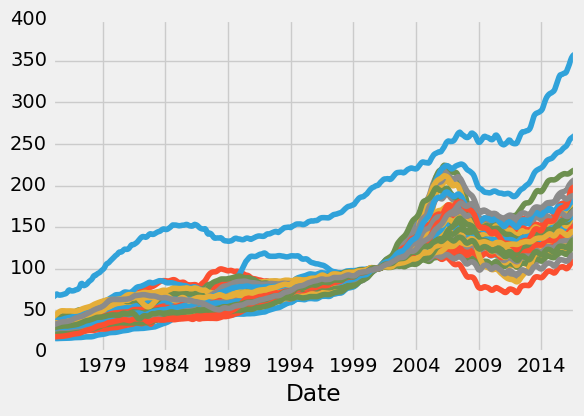

In [98]:
HPI_data.plot()
pyplot.legend().remove()
pyplot.show()

# All those prices seem to converge perfectly in 2000! Well, this is just when the 100.0% of the index starts.
# What about some sort of percent change?

In [99]:
# Pandas has you covered here with all sorts of "rolling" statistics.
HPI_pct_change_data=HPI_data.pct_change()

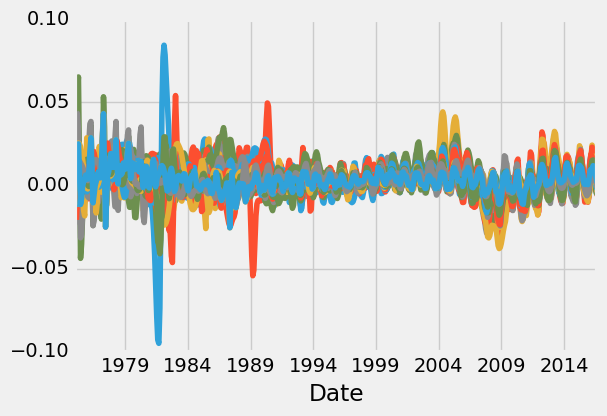

In [101]:
HPI_pct_change_data.plot()
pyplot.legend().remove()
pyplot.show()

# This is not a traditional % Change chart. 
# This is %change from the last reported value.

In [107]:
HPI_pct_change=HPI_data
for col in HPI_pct_change.columns:
    HPI_pct_change[col]=(HPI_pct_change[col]-HPI_pct_change[col][0])/HPI_pct_change[col][0]*100.0

<module 'matplotlib.pyplot' from 'C:\\Program Files\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

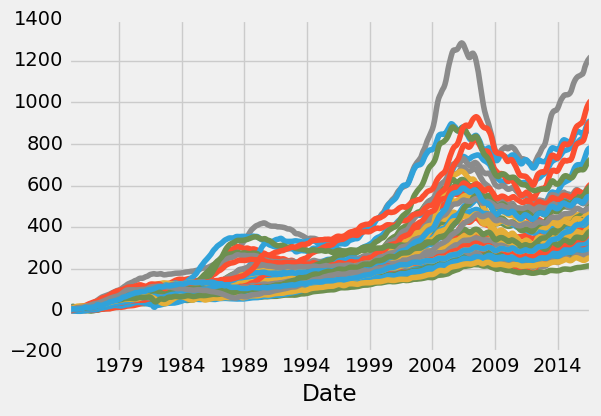

In [108]:
HPI_pct_change.plot()
pyplot.legend().remove()
pyplot.show()

# This is a % change for the HPI itself, by state. 
# The first % change is still useful too for various reasons. 
# We may wind up using that one in conjunction or instead, 
# but, for now, we'll stick with typical % change from a starting point.

In [112]:
# For this data, a benchmark would be the House Price Index for the United States.
def HPI_Benchmark():
    df = quandl.get("FMAC/HPI_USA", authtoken="Ti87qx22utFydZWJHqyB")
    df.rename(columns={'Value':'United States'},inplace=True)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

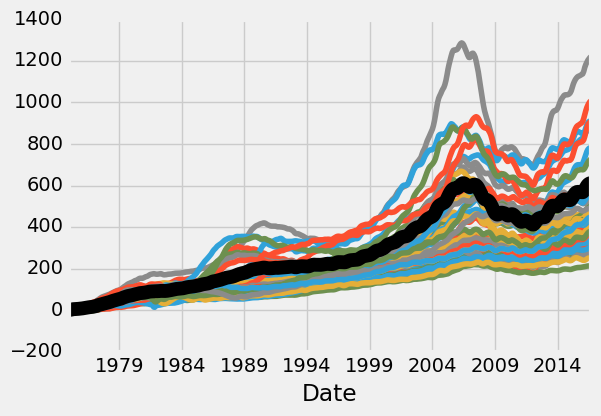

In [114]:
fig = pyplot.figure()
ax1 = pyplot.subplot2grid((1,1), (0,0))

benchmark = HPI_Benchmark()
HPI_pct_change.plot(ax=ax1)
benchmark.plot(color='k',ax=ax1, linewidth=10)

pyplot.legend().remove()
pyplot.show()

# Looking at this data, it appears to be that all markets are relatively closely obeying each other as well as 
# the overall house price index. There does exist some mean deviation here, but basically every market appears 
# to follow a very similar trend. There winds up being quite a major divergence in the end, from 200% increase 
# to over 800% increase, so obviously we have a major divergence there, but the mean is between 400 and 500% 
# growth in the last upper 30 years.